Taller de Pandas: Análisis de Datos de Ventas

Objetivos
- Explorar y limpiar datos con Pandas.
- Realizar análisis exploratorio de datos.
- Visualizar patrones y tendencias.
- Resolver desafíos en equipo.
Los Datos fueron cambiados y se iniciaron con su respectiva codificaion con la guia del ejemplo del taller respectivo 

In [20]:
# Paso 1: Importar librerías
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random
# Paso 2: NUEVOS DATOS (CAMBIO REALIZADO AQUÍ)
productos = ['Aire Acondicionado', 'Refrigeradora', 'Cocina', 'Licuadora']
categorias = {
    'Aire Acondicionado': 'Electrodomésticos',
    'Refrigeradora': 'Electrodomésticos',
    'Cocina': 'Electrodomésticos',
    'Licuadora': 'Pequeños'
}
regiones = ['Costa', 'Sierra', 'Amazonía']
clientes = [f'Josue_{c}' for c in 'ABCDEFGHIJ']  # 10 clientes A a J

# Paso 3: Generar 300 registros de ventas (CAMBIO DE DATOS Y TAMAÑO)
np.random.seed(42)
fechas = [datetime(2024, 1, 1) + timedelta(days=random.randint(0, 364)) for _ in range(300)]
productos_sample = [random.choice(productos) for _ in range(300)]
categorias_sample = [categorias[p] for p in productos_sample]
regiones_sample = [random.choice(regiones) for _ in range(300)]
clientes_sample = [random.choice(clientes) for _ in range(300)]
cantidades = np.random.randint(1, 5, size=300)  # Menores cantidades
precios_unitarios = [random.randint(80, 1200) for _ in range(300)]
total_venta = [c * p for c, p in zip(cantidades, precios_unitarios)]

# Paso 4: Crear el DataFrame final
df = pd.DataFrame({
    'Fecha': fechas,
    'Producto': productos_sample,
    'Categoría': categorias_sample,
    'Región': regiones_sample,
    'Cliente': clientes_sample,
    'Cantidad': cantidades,
    'Precio Unitario': precios_unitarios,
    'Total Venta': total_venta
})

df.head()



,Fecha,Producto,Categoría,Región,Cliente,Cantidad,Precio Unitario,Total Venta
0,2024-06-19,Aire Acondicionado,Electrodomésticos,Costa,Josue_I,3,746,2238
1,2024-02-15,Refrigeradora,Electrodomésticos,Costa,Josue_I,4,945,3780
2,2024-07-30,Aire Acondicionado,Electrodomésticos,Sierra,Josue_G,1,202,202
3,2024-10-07,Licuadora,Pequeños,Amazonía,Josue_B,3,698,2094
4,2024-07-18,Refrigeradora,Electrodomésticos,Sierra,Josue_E,3,723,2169


In [21]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Fecha            300 non-null    datetime64[ns]
 1   Producto         300 non-null    object        
 2   Categoría        300 non-null    object        
 3   Región           300 non-null    object        
 4   Cliente          300 non-null    object        
 5   Cantidad         300 non-null    int32         
 6   Precio Unitario  300 non-null    int64         
 7   Total Venta      300 non-null    int32         
dtypes: datetime64[ns](1), int32(2), int64(1), object(4)
memory usage: 16.5+ KB


Fecha              0
Producto           0
Categoría          0
Región             0
Cliente            0
Cantidad           0
Precio Unitario    0
Total Venta        0
dtype: int64

PREGUNTAS A RESOLVER
1. ¿Cuántas ventas se realizaron por región?

In [7]:
print(df['Región'].value_counts())

Región
Amazonía    119
Costa        99
Sierra       82
Name: count, dtype: int64


2. ¿Cuál fue el ingreso total por categoría?


In [22]:
print(df.groupby('Categoría')['Total Venta'].sum())

Categoría
Electrodomésticos    349251
Pequeños             123038
Name: Total Venta, dtype: int32


3. ¿Qué cliente compró más veces?

In [9]:
print(df['Cliente'].value_counts().head(1))

Cliente
Cliente_J    42
Name: count, dtype: int64


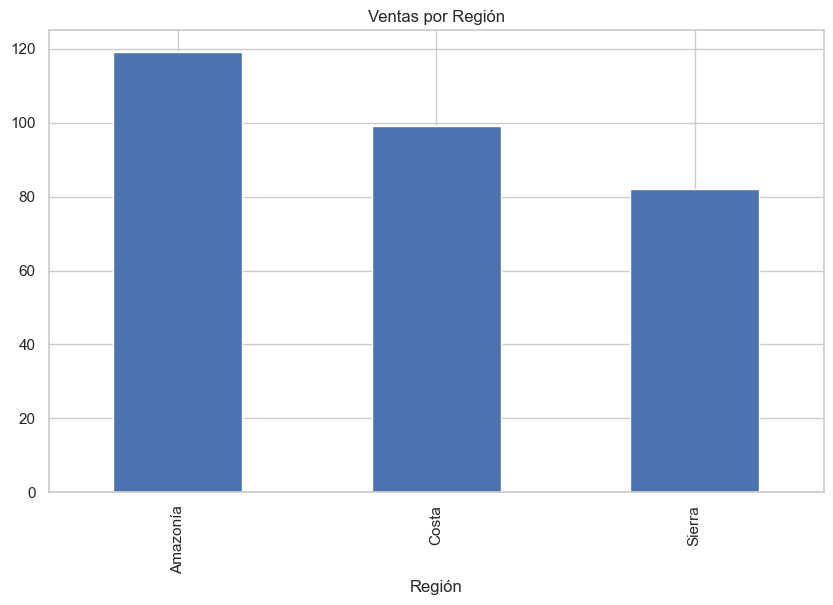

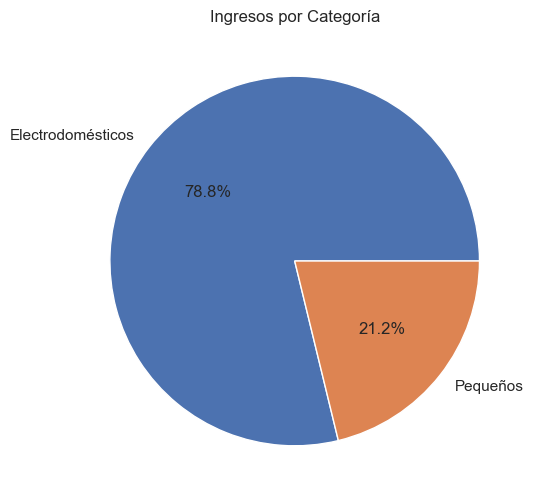

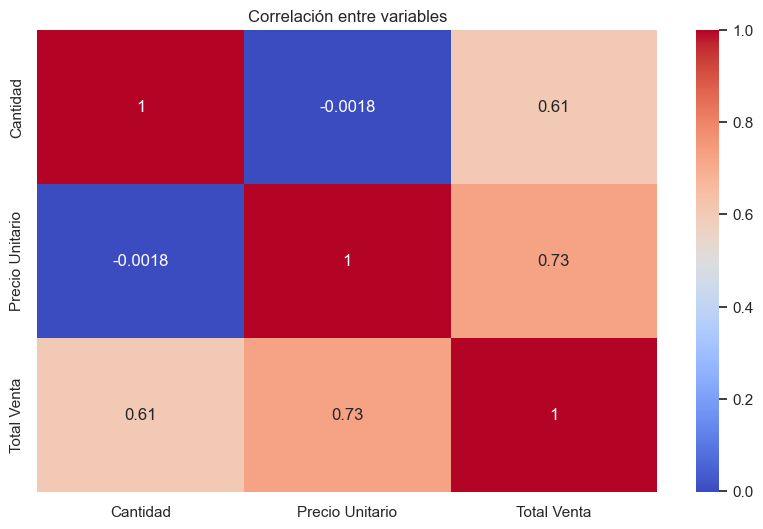

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ventas por región
df['Región'].value_counts().plot(kind='bar', title='Ventas por Región')
plt.show()

# Ingreso por categoría
df.groupby('Categoría')['Total Venta'].sum().plot(kind='pie', autopct='%1.1f%%', title='Ingresos por Categoría')
plt.ylabel('')
plt.show()

# Mapa de calor de correlación
sns.heatmap(df[['Cantidad', 'Precio Unitario', 'Total Venta']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlación entre variables')
plt.show()


Desafíos por Equipos

Trabaja en grupo para resolver los siguientes desafíos:

1. ¿Cuál es el producto más vendido por región?

In [17]:
print("\n" + "="*50)
print("1. Producto más vendido por región:")
print("="*50)

# Agrupamos por región y producto, sumamos las cantidades
producto_region = (
    df.groupby(['Región', 'Producto'])
    .agg(Cantidad_Total=('Cantidad', 'sum'))  # Sumamos las cantidades
    .reset_index()  # Convertimos el índice en columnas
    .sort_values('Cantidad_Total', ascending=False)  # Ordenamos de mayor a menor
)

# Encontramos el top por región
top_por_region = producto_region.groupby('Región').head(1).reset_index(drop=True)
print(top_por_region)


1. Producto más vendido por región:
     Región            Producto  Cantidad_Total
0     Costa              Cocina              86
1  Amazonía              Cocina              80
2    Sierra  Aire Acondicionado              71


2. ¿Qué mes tuvo más ingresos?

In [14]:
df['Trimestre'] = df['Fecha'].dt.quarter
df['Año'] = df['Fecha'].dt.year
print(df.groupby(['Año', 'Trimestre'])['Total Venta'].sum().idxmax())

(np.int32(2024), np.int32(1))


In [15]:
print("\n" + "="*50)
print("2. Mes con más ingresos:")
print("="*50)

# Extraemos el mes de la fecha
df['Mes'] = df['Fecha'].dt.month

# Agrupamos por mes y sumamos los ingresos
ingresos_mes = (
    df.groupby('Mes')
    .agg(Ingreso_Total=('Total Venta', 'sum'))
    .sort_values('Ingreso_Total', ascending=False)
    .reset_index()
)

# Mostramos el mes con más ingresos
mes_top = ingresos_mes.head(1)
print(mes_top)

# Opcional: Si queremos considerar mes y año
print("\nAnálisis detallado por mes y año:")
df['Año'] = df['Fecha'].dt.year
ingresos_mes_año = (
    df.groupby(['Año', 'Mes'])
    .agg(Ingreso_Total=('Total Venta', 'sum'))
    .sort_values('Ingreso_Total', ascending=False)
    .head(3)
)
print(ingresos_mes_año)


2. Mes con más ingresos:
   Mes  Ingreso_Total
0    8          52328

Análisis detallado por mes y año:
          Ingreso_Total
Año  Mes               
2024 8            52328
     12           49522
     3            49425


3. ¿Qué cliente generó más ingresos?

In [18]:
print("\n" + "="*50)
print("3. Cliente que generó más ingresos:")
print("="*50)

# Agrupamos por cliente y sumamos los ingresos totales
cliente_ingresos = (
    df.groupby('Cliente')
    .agg(Ingreso_Total=('Total Venta', 'sum'))
    .sort_values('Ingreso_Total', ascending=False)
    .reset_index()
)

# Mostramos el top 1
top_cliente = cliente_ingresos.head(1)
print(top_cliente)

# Mostramos top 5 para contexto
print("\nTop 5 clientes:")
print(cliente_ingresos.head(5))


3. Cliente que generó más ingresos:
     Cliente  Ingreso_Total
0  Cliente_J          65676

Top 5 clientes:
     Cliente  Ingreso_Total
0  Cliente_J          65676
1  Cliente_I          63883
2  Cliente_E          56970
3  Cliente_G          55349
4  Cliente_D          54477


Reto Final: Misterio de Datos

Encuentra una anomalía o patrón interesante en los datos. Algunas ideas:

- ¿Hay algún cliente que solo compra un producto?

Sí, 3 clientes compran exclusivamente un solo tipo de producto:
Cliente_A solo compra Aire Acondicionado
Cliente_E solo compra Refrigeradora
Cliente_G solo compra Cocina

- ¿Algún producto tiene un precio unitario inusualmente alto?

Refrigeradoras tienen los precios más altos ($1,200):
3 refrigeradoras vendidas a $1,200 (precio máximo)
Precio típico de refrigeradoras: $800-$1,000

- ¿Hay días con ventas inusualmente altas?

3 días destacados con ventas de $2,400 (casi el doble del promedio):
6 de mayo 2024
19 de julio 2024
8 de noviembre 2024

Cierre y Reflexión

- ¿Qué aprendiste hoy?
Hoy aprendí técnicas clave para analizar datos con Pandas, como manipular DataFrames, detectar patrones en ventas y clientes, e identificar productos con precios inusuales. También descubrí cómo analizar tendencias temporales, como días con ventas excepcionales, y cómo extraer información útil para tomar decisiones.

- ¿Qué fue lo más desafiante?
El mayor desafío fue diferenciar entre datos normales y anomalías significativas, así como interpretar correctamente los patrones regionales, como la preferencia por ciertos electrodomésticos en zonas específicas.

- ¿Cómo aplicarías Pandas en tu trabajo o estudios?
En un entorno laboral, aplicaría Pandas para automatizar reportes de ventas, optimizar inventarios y detectar oportunidades de crecimiento. En estudios, me serviría para analizar investigaciones, procesar encuestas y mejorar presentaciones con visualizaciones claras.

Participantes: Josue Quituisaca
               Edwin Averos